#Swing Trading Algo Basics

This notebook provides an overview of some of the important parts of algo stock trading. Last lessons we looked at some machine learning models. In order to integrate them we should review some of the basics. 

First what we are doing is actually portfolio management and if we are doing this correctly most if not all of our capital will be deployed. We need to remember we are not only predicting stocks but taking a stance on an approach to the market.

## What we will learn today:

1.   Basic Steps for bringing an Algo into production
2.   Basic Components of an Algo
3.   Where machine learning fits into it?




## Algo Trading Strategy Basics:
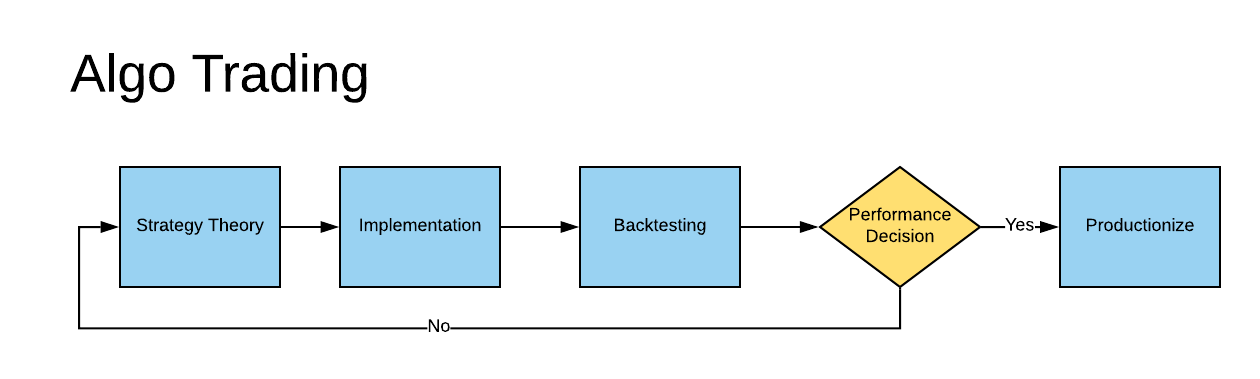

1. Determine and theory along with an approach on how to utilize. 
2. Implement Basics
3. Back Testing

## Broad Algo Trading Components:
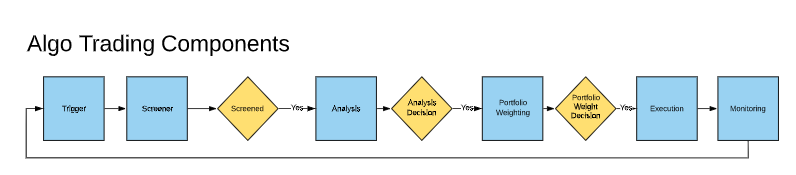
Theory or Approach: We want to make an assumption and approach then proceed to implementing and testing. 

1. Trigger - When do we get a list of stocks or do we review the current portfolio. For our purposes we are doing swing trading using daily values so we can assume we can run this approach daily, weekly or monthly. Personally I prefer the shortest feedback loop.
2. Screen - We want to be able to easily filter on some basic criteria to filter the stocks to one we know meet some standards. Some basic criteria might be enough volume so we have purchasers, no legal actions so we don't get surprises, certain market cap, and certain share price. 
3. Analysis - Now we want to do some analysis on the current stock and determine if we can make money on it. This along with a number other criteria to determine the credibility and value of the opportunity. This could be fundemental analysis, statisical analysis, or technical analysis. 
4. Portfolio Weighting - Given current portfolio and opportunity, what to do next?
5. Execution - Perform the action that is determine to compliment the portfolio management strategy. 
6. Monitor - Monitor all positions and determine if any issues are arising. 

## Machine Learning Algo Trading 

![alt text](https://miro.medium.com/max/1400/1*0l4F7zZsSRV81VL9j3s5Zg.png)

In [2]:
#!pip install git+https://github.com/Deamoner/ultimate-stock-machine-learning-training-dataset
!git clone https://github.com/Deamoner/ultimate-stock-machine-learning-training-dataset

fatal: destination path 'ultimate-stock-machine-learning-training-dataset' already exists and is not an empty directory.


In [0]:
%matplotlib inline

In [4]:
!pip install --upgrade pandas==0.25.1
!pip install bt

Requirement already up-to-date: pandas==0.25.1 in /usr/local/lib/python3.6/dist-packages (0.25.1)
  Using cached https://files.pythonhosted.org/packages/b8/5d/45a8b24d0cbf19591beb41b7c6d0b500494c13b9e8de0eecc4a4df7446a3/bt-0.2.7.tar.gz
  Using cached https://files.pythonhosted.org/packages/b0/9f/0a16afc87d307140ecf3aa78df3985ee2b3fc67ee883ff53edada022a8aa/ffn-0.3.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/1e/30/e76fb0c45da8aef49ea8d2a90d4e7a6877b45894c25f12fb961f009a891e/PyPrind-2.11.2-py3-none-any.whl
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533292 sha256=b89c4976f6a52741fb989f80a6a94a677cf322e812b1ceb27d75356289c9777b
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22814 sha256=ed11c42ee6a226cce99d84d37b3d5e0270e0cb2645739f44f28e8dc6fa290976
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81

In [5]:
import bt
# download data
data = bt.get('aapl,msft,c,gs,ge,uaa', start='2010-01-01')

# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average, right?
sma = data.rolling(50).mean()

#http://pmorissette.github.io/bt/examples.html


/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Figure(1080x360)


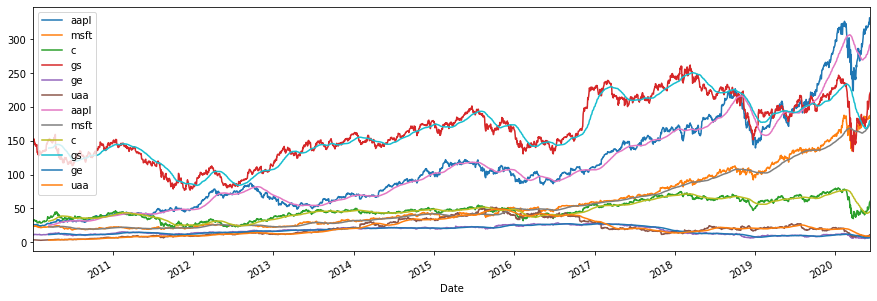

In [6]:
# let's see what the data looks like - this is by no means a pretty chart, but it does the job
% matplotlib inline
plot = bt.merge(data, sma).plot(figsize=(15, 5))
print(plot.figure)

In [0]:
#algo dev
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.ix[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

In [8]:
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t)

above50sma
0% [##                            ] 100% | ETA: 00:00:01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


0% [############################# ] 100% | ETA: 00:00:00

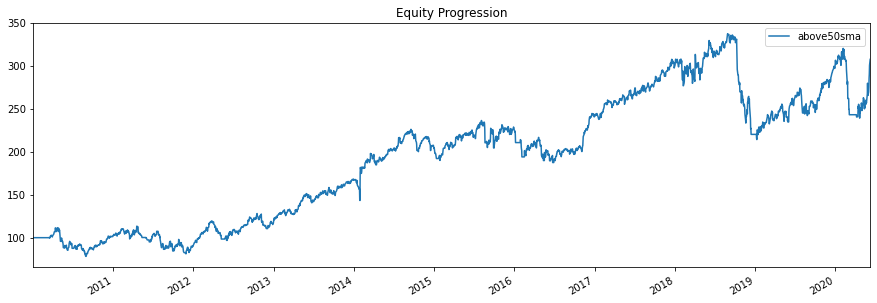

In [9]:
res.plot()

In [10]:
res.display()

Stat                 above50sma
-------------------  ------------
Start                2010-01-03
End                  2020-06-08
Risk-free rate       0.00%

Total Return         207.37%
Daily Sharpe         0.59
Daily Sortino        0.97
CAGR                 11.37%
Max Drawdown         -36.50%
Calmar Ratio         0.31

MTD                  15.79%
3m                   26.51%
6m                   8.39%
YTD                  2.93%
1Y                   21.45%
3Y (ann.)            4.32%
5Y (ann.)            7.01%
10Y (ann.)           13.66%
Since Incep. (ann.)  11.37%

Daily Sharpe         0.59
Daily Sortino        0.97
Daily Mean (ann.)    13.23%
Daily Vol (ann.)     22.25%
Daily Skew           1.26
Daily Kurt           29.64
Best Day             22.93%
Worst Day            -7.99%

Monthly Sharpe       0.61
Monthly Sortino      0.94
Monthly Mean (ann.)  13.26%
Monthly Vol (ann.)   21.73%
Monthly Skew         -0.97
Monthly Kurt         1.73
Best Month           15.79%
Worst Month          